<a href="https://colab.research.google.com/github/CoaDiego/SIS420---IA/blob/main/LABORATORIO_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 02 de Programación Regresión Lineal Multiple

In [1]:
# utilizado para manejos de directorios y rutas
import os
import sklearn as skl

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D


# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
from sklearn.preprocessing import OrdinalEncoder #Se importa la libreria para convertir características categóricas en datos numéricos ordinales.
                                                  #Se usara para 3 columnas del dataset
# Cargar datos
dataset = pd.read_csv('/content/gdrive/MyDrive/SIS420-IA/datasets/Lab1/Diamonds Prices2022.csv')
dataframe = dataset
print(dataframe) #Se muestra las caracteristicas del dataset

cut_cat = dataframe[['cut']]
color_cat = dataframe[['color']]
clarity_cat = dataframe[['clarity']]
print(cut_cat.head(10))
print(color_cat.head(10))
print(clarity_cat.head(10)) #Se verifica que las columnas que se quiere convertir a datos numericos sean correctas

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   
53940       53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53941       53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53942       53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   

          y     z  
0      3.98  2.43  

Se convierte las columnas anteriormente mencionadas en datos numericos esto para no tener problemas con el resto de codigo y columnas.

In [4]:
#Caracteristica Corte
ordinal_encoder = OrdinalEncoder()
cut_cat_encoded = ordinal_encoder.fit_transform(cut_cat)
print(cut_cat_encoded[:10])
dataframe['cut'] = cut_cat_encoded
#Caracteristica claridad
clarity_cat_encoded = ordinal_encoder.fit_transform(clarity_cat)
dataframe['clarity'] = clarity_cat_encoded
print(clarity_cat_encoded[:10])
#Caracteristica color
color_cat_encoded = ordinal_encoder.fit_transform(color_cat)
dataframe['color'] = color_cat_encoded
print(color_cat_encoded[:10])

[[2.]
 [3.]
 [1.]
 [3.]
 [1.]
 [4.]
 [4.]
 [4.]
 [0.]
 [4.]]
[[3.]
 [2.]
 [4.]
 [5.]
 [3.]
 [7.]
 [6.]
 [2.]
 [5.]
 [4.]]
[[1.]
 [1.]
 [1.]
 [5.]
 [6.]
 [6.]
 [5.]
 [4.]
 [1.]
 [4.]]


In [5]:
print(dataframe.describe()) #Se verifica que las columnas esten con datos numericos

         Unnamed: 0         carat           cut         color       clarity  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean   26972.000000      0.797935      2.553047      2.594127      3.835104   
std    15572.147122      0.473999      1.027702      1.701087      1.724587   
min        1.000000      0.200000      0.000000      0.000000      0.000000   
25%    13486.500000      0.400000      2.000000      1.000000      2.000000   
50%    26972.000000      0.700000      2.000000      3.000000      4.000000   
75%    40457.500000      1.040000      3.000000      4.000000      5.000000   
max    53943.000000      5.010000      4.000000      6.000000      7.000000   

              depth         table         price             x             y  \
count  53943.000000  53943.000000  53943.000000  53943.000000  53943.000000   
mean      61.749322     57.457251   3932.734294      5.731158      5.734526   
std        1.432626      2.234549   3989.338447    

## 2 Regresión lineal con multiples variables

<a id="section4"></a>
### 2.1 Normalización de caracteristicas


In [8]:
# Selecciona todas las columnas excepto la octava (índice 7)
X = dataset.drop(columns=dataset.columns[7]).values  # Elimina la columna 7 del DataFrame y convierte a NumPy
y = dataset.iloc[:, 7].values   # Selecciona la octava columna (índice 7) como 'y'
m = y.size
print(m)

# Imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))


53943
  X[:,0] X[:, 1]         y
--------------------------
       1       0       326
       2       0       326
       3       0       327
       4       0       334
       5       0       335
       6       0       336
       7       0       336
       8       0       337
       9       0       337
      10       0       338


In [9]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [10]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.0000e+00 2.3000e-01 2.0000e+00 ... 3.9500e+00 3.9800e+00 2.4300e+00]
 [2.0000e+00 2.1000e-01 3.0000e+00 ... 3.8900e+00 3.8400e+00 2.3100e+00]
 [3.0000e+00 2.3000e-01 1.0000e+00 ... 4.0500e+00 4.0700e+00 2.3100e+00]
 ...
 [5.3941e+04 7.1000e-01 3.0000e+00 ... 5.7900e+00 5.7400e+00 3.4900e+00]
 [5.3942e+04 7.1000e-01 3.0000e+00 ... 5.7400e+00 5.7300e+00 3.4300e+00]
 [5.3943e+04 7.0000e-01 4.0000e+00 ... 5.7100e+00 5.7600e+00 3.4700e+00]]
Media calculada: [2.69720000e+04 7.97934672e-01 2.55304673e+00 2.59412713e+00
 3.83510372e+00 6.17493224e+01 5.74572512e+01 5.73115807e+00
 5.73452644e+00 3.53872958e+00]
Desviación estandar calculada: [1.55720028e+04 4.73994160e-01 1.02769210e+00 1.70107132e+00
 1.72457066e+00 1.43261299e+00 2.23452824e+00 1.12171919e+00
 1.14209233e+00 7.05672930e-01]
[[-1.7320187  -1.19818918 -0.53814438 ... -1.58788233 -1.5362387
  -1.57116638]
 [-1.73195448 -1.24038379  0.4349097  ... -1.64137165 -1.65882074
  -1.74121683]
 [-1.73189026 -1.19818918 -1.51119847 .

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [11]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [12]:
print(X)

[[ 1.         -1.7320187  -1.19818918 ... -1.58788233 -1.5362387
  -1.57116638]
 [ 1.         -1.73195448 -1.24038379 ... -1.64137165 -1.65882074
  -1.74121683]
 [ 1.         -1.73189026 -1.19818918 ... -1.49873345 -1.45743597
  -1.74121683]
 ...
 [ 1.          1.73189026 -0.18551847 ...  0.05245691  0.00479257
  -0.06905407]
 [ 1.          1.73195448 -0.18551847 ...  0.00788248 -0.00396329
  -0.15407929]
 [ 1.          1.7320187  -0.20661578 ... -0.01886218  0.02230429
  -0.09739581]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

In [13]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [64]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [3932.73429361  156.32695391 3726.84176862   83.86600149 -420.97705213
  510.01812757 -119.52353741 -195.29624308  339.78246866  -18.42406286
  -85.24912891]


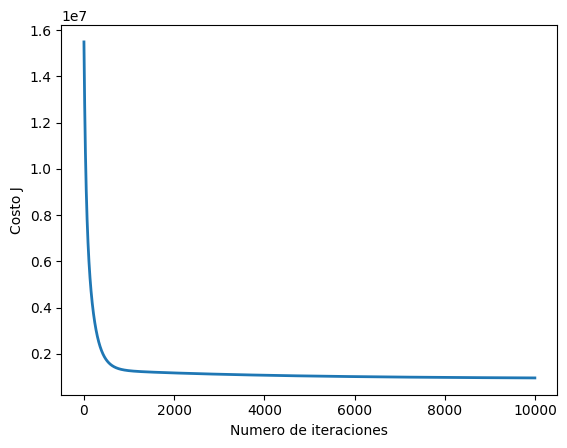

In [52]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [72]:
# Selecciona 100 datos aleatorios del conjunto de datos normalizado
ejemplos_alea = 100 #Numero de ejemplos aleatorios que se quiere tener
indices = np.random.choice(X_norm.shape[0], ejemplos_alea, replace=False) #Indices para sacar n filas aleatorias de X y Y
X_random = X_norm[indices]
y_random = y[indices]

# Normalizar los datos aleatorios seleccionados usando las medias y desviaciones estándar calculadas
X_random_norm = (X_random - mu) / sigma

# Añadir el término de intersección (sesgo) a los datos aleatorios normalizados
X_random_norm = np.concatenate([np.ones((ejemplos_alea, 1)), X_random_norm], axis=1)

# Realizar las predicciones usando el modelo entrenado
precio = np.dot(X_random_norm, theta)

# Imprimir algunas de las predicciones
print('Algunas predicciones para los 100 datos aleatorios, usando el descenso de la gradiente:')
for i in range(100):  # Mostrar las primeras 5 predicciones como ejemplo
    print(f'Predicción {i + 1} del precio de Diamantes: ${precio[i]:.0f}')

# Imprimir las primeras 5 verdaderas etiquetas (precios) para comparar
#print('Valores verdaderos para los 100 datos aleatorios:')
#for i in range(100):
#    print(f'Valor real {i + 1}: ${y_random[i]:.0f}')

Algunas predicciones para los 100 datos aleatorios, usando el descenso de la gradiente:
Predicción 1 del precio de Diamantes: $-3579
Predicción 2 del precio de Diamantes: $-10977
Predicción 3 del precio de Diamantes: $-12830
Predicción 4 del precio de Diamantes: $19599
Predicción 5 del precio de Diamantes: $28883
Predicción 6 del precio de Diamantes: $11322
Predicción 7 del precio de Diamantes: $-11772
Predicción 8 del precio de Diamantes: $26084
Predicción 9 del precio de Diamantes: $-12306
Predicción 10 del precio de Diamantes: $19786
Predicción 11 del precio de Diamantes: $49569
Predicción 12 del precio de Diamantes: $180
Predicción 13 del precio de Diamantes: $20041
Predicción 14 del precio de Diamantes: $-12356
Predicción 15 del precio de Diamantes: $-12461
Predicción 16 del precio de Diamantes: $6247
Predicción 17 del precio de Diamantes: $19870
Predicción 18 del precio de Diamantes: $5911
Predicción 19 del precio de Diamantes: $25881
Predicción 20 del precio de Diamantes: $54087

<a id="section7"></a>
### 2.3 Ecuacion de la Normal


In [67]:
from sklearn.preprocessing import OrdinalEncoder #Se importa la libreria para convertir características categóricas en datos numéricos ordinales.
                                                  #Se usara para 3 columnas del dataset
# Cargar datos
dataset = pd.read_csv('/content/gdrive/MyDrive/SIS420-IA/datasets/Lab1/Diamonds Prices2022.csv')
dataframe = dataset
print(dataframe) #Se muestra las caracteristicas del dataset

#Caracteristica Corte
ordinal_encoder = OrdinalEncoder()
cut_cat_encoded = ordinal_encoder.fit_transform(cut_cat)
dataframe['cut'] = cut_cat_encoded
#Caracteristica claridad
clarity_cat_encoded = ordinal_encoder.fit_transform(clarity_cat)
dataframe['clarity'] = clarity_cat_encoded
#Caracteristica color
color_cat_encoded = ordinal_encoder.fit_transform(color_cat)
dataframe['color'] = color_cat_encoded

# Selecciona todas las columnas excepto la octava (índice 7)
X = dataset.drop(columns=dataset.columns[7]).values  # Elimina la columna 7 del DataFrame y convierte a NumPy
y = dataset.iloc[:, 7].values   # Selecciona la octava columna (índice 7) como 'y'
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(m)

# Imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))



       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   
53940       53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53941       53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53942       53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   

          y     z  
0      3.98  2.43  

In [68]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [69]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


Theta calculado a partir de la ecuación de la normal: [ 1.49090418e+04  7.21471973e-03  1.08772892e+04  7.31934923e+01
 -2.66789775e+02  2.86110982e+02 -1.47896604e+02 -9.13574021e+01
 -1.10791621e+03  5.06911432e+01 -4.80579630e-01]


In [79]:
# Selecciona 100 datos aleatorios del conjunto de datos
ejemplos_alea = 100 #Numero de ejemplos aleatorios que se quiere tener
indices = np.random.choice(X.shape[0], ejemplos_alea, replace=False) #Indices para sacar n filas aleatorias de X y Y
X_random = X[indices]
y_random = y[indices]
# Realizar las predicciones usando el modelo entrenado
precio = np.dot(X_random, theta)

# Imprimir algunas de las predicciones
print('Algunas predicciones para los 100 datos aleatorios, usando la Ecuación de la normal:')
for i in range(100):  # Mostrar las primeras 5 predicciones como ejemplo
    print(f'Precio {i + 1} de diamantes: ${precio[i]:.0f}')


Algunas predicciones para los 100 datos aleatorios, usando la Ecuación de la normal:
Precio 1 de diamantes: $15779
Precio 2 de diamantes: $7196
Precio 3 de diamantes: $6618
Precio 4 de diamantes: $3078
Precio 5 de diamantes: $10452
Precio 6 de diamantes: $1373
Precio 7 de diamantes: $3839
Precio 8 de diamantes: $2558
Precio 9 de diamantes: $8565
Precio 10 de diamantes: $9465
Precio 11 de diamantes: $3780
Precio 12 de diamantes: $6735
Precio 13 de diamantes: $3831
Precio 14 de diamantes: $900
Precio 15 de diamantes: $2598
Precio 16 de diamantes: $1977
Precio 17 de diamantes: $1560
Precio 18 de diamantes: $2911
Precio 19 de diamantes: $1386
Precio 20 de diamantes: $3199
Precio 21 de diamantes: $4540
Precio 22 de diamantes: $2437
Precio 23 de diamantes: $9708
Precio 24 de diamantes: $1016
Precio 25 de diamantes: $8262
Precio 26 de diamantes: $5642
Precio 27 de diamantes: $374
Precio 28 de diamantes: $6206
Precio 29 de diamantes: $1063
Precio 30 de diamantes: $-150
Precio 31 de diamantes: 